<a href="https://colab.research.google.com/github/jkcg-learning/ObjectRecognition/blob/master/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Dphi**

**Deep Learning Bootcamp - Assignment 1 - Intermediate: Object Recognition**


***Prepared by : Jyothish Kumar C G***

Can you classify the object in the image?


***Context***


Image recognition is a vital component in robotics such as driverless vehicles or domestic robots. Image recognition is also important in image search engines such as Google or Bing image search whereby you use rich image content to query for similar stuff. Like in Google photos where the system uses image recognition to categorize your images into things like cats, dogs, people and so on so that you can quickly search your albums for things like, “give me photos of my cat”, that's awesome.



***About the Data***

The training dataset consists of 50,000 32X32 colour images of 10 different objects. These are the different classes of images in the dataset.

Ship,Aeroplane,Automobile,Bird,Cat,Deer,Dog,Frog,Horse,Truck

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.3.0


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_validation,y_validation) = load_data()

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_validation[0].shape

(32, 32, 3)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[0]

array([6], dtype=uint8)

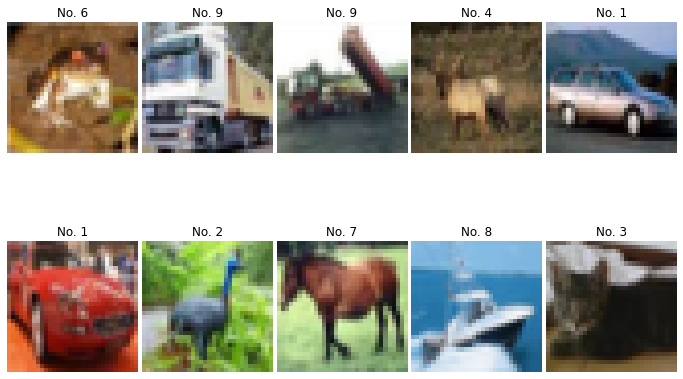

In [ ]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,8),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [ ]:
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

val_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1)

train_generator.fit(x_train)
val_generator.fit(x_validation)

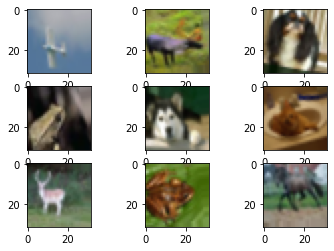

In [ ]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [ ]:
x_train=x_train.astype("float32")  
mean=np.mean(x_train)
std=np.std(x_train)
x_train=(x_train-mean)/std

In [ ]:
x_validation=x_validation.astype("float32")  
mean_validation=np.mean(x_validation)
std_validation=np.std(x_validation)
x_validation=(x_validation-mean_validation)/std_validation

In [ ]:
x_train[0]

array([[[-0.9619245 , -0.91515917, -0.8995707 ],
        [-1.2113398 , -1.1645745 , -1.1801629 ],
        [-1.1022207 , -1.1333976 , -1.2113398 ],
        ...,
        [ 0.58133286,  0.17603296, -0.19809005],
        [ 0.48780212,  0.06691375, -0.2916208 ],
        [ 0.4254483 ,  0.05132529, -0.27603233]],

       [[-1.6322283 , -1.5698744 , -1.5698744 ],
        [-1.8816435 , -1.8816435 , -1.8816435 ],
        [-1.6010513 , -1.756936  , -1.8816435 ],
        ...,
        [ 0.03573683, -0.5098592 , -1.0242784 ],
        [-0.026617  , -0.5878015 , -1.1022207 ],
        [ 0.02014837, -0.52544767, -0.9931014 ]],

       [[-1.4919322 , -1.5075206 , -1.554286  ],
        [-1.6322283 , -1.7725244 , -1.8816435 ],
        [-1.117809  , -1.4607552 , -1.756936  ],
        ...,
        [-0.04220546, -0.57221305, -1.1022207 ],
        [-0.01102854, -0.57221305, -1.1022207 ],
        [-0.18250158, -0.7436861 , -1.2269284 ]],

       ...,

       [[ 1.3607558 ,  0.7683944 , -0.38515157],
        [ 1

In [ ]:
x_validation[0]

array([[[ 0.5693124 , -0.148754  , -1.1321927 ],
        [ 0.58492255, -0.16436414, -1.163413  ],
        [ 0.6785834 , -0.08631345, -1.1009725 ],
        ...,
        [ 0.24149947, -0.41412637, -1.3351246 ],
        [ 0.06978794, -0.47656694, -1.3351246 ],
        [-0.08631345, -0.57022774, -1.381955  ]],

       [[ 0.47565156, -0.148754  , -1.1009725 ],
        [ 0.4600414 , -0.17997429, -1.272684  ],
        [ 0.58492255, -0.11753373, -1.1946334 ],
        ...,
        [ 0.22588933, -0.41412637, -1.4131752 ],
        [ 0.0541778 , -0.47656694, -1.3975651 ],
        [-0.03948303, -0.5233973 , -1.3663448 ]],

       [[ 0.4600414 , -0.17997429, -1.163413  ],
        [ 0.4600414 , -0.19558443, -1.381955  ],
        [ 0.5693124 , -0.16436414, -1.3351246 ],
        ...,
        [ 0.27271974, -0.36729595, -1.3663448 ],
        [ 0.1322285 , -0.41412637, -1.3663448 ],
        [-0.02387289, -0.5077872 , -1.381955  ]],

       ...,

       [[-0.83560014,  0.03856766,  0.86590505],
        [-1

In [ ]:
# define input shape
INPUT_SHAPE = (32, 32, 3)

# get the VGG19 model
vgg_layers = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE)

vgg_layers.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f60b1aea358> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b1aba2b0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b1a48a20> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f60b1a4f240> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b1a64ac8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b1a9c240> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f60b1ab07b8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b01f2978> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b01f47f0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b01f4898> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f60b017d7f0> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f60b0185

In [ ]:
'''Learning Rate Annealer: The learning rate can be modified after a set number of epochs or after a certain condition is met. We will use the latter and change the learning rate if 
the validation error does not reduce after a set number of epochs. To do this we will use the patience parameter.'''

lrr= ReduceLROnPlateau(
                       monitor='val_loss', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_loss, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

In [ ]:
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
# define sequential model
model = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu',input_dim=256))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))

#model.add(Dense(1024,activation=('relu'),input_dim=512))
#model.add(Dense(512,activation=('relu'))) 
#model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
#model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))



# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [ ]:
EPOCHS = 100

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, 
                                               restore_best_weights=True,
                                               verbose=2)

history = model.fit(x_train, y_train,
                    batch_size=128,
                    callbacks=[es_callback], 
                    validation_data=(x_validation, y_validation), epochs=EPOCHS,
                    verbose=1)

Epoch 1/100
391/391 [==============================] - 27s 69ms/step - loss: 1.9104 - accuracy: 0.2169 - val_loss: 1.6362 - val_accuracy: 0.3305
Epoch 2/100
391/391 [==============================] - 26s 67ms/step - loss: 1.6166 - accuracy: 0.3393 - val_loss: 1.5054 - val_accuracy: 0.4070
Epoch 3/100
391/391 [==============================] - 26s 65ms/step - loss: 1.4958 - accuracy: 0.4049 - val_loss: 1.4299 - val_accuracy: 0.4447
Epoch 4/100
391/391 [==============================] - 26s 65ms/step - loss: 1.4617 - accuracy: 0.4442 - val_loss: 1.4768 - val_accuracy: 0.4436
Epoch 5/100
391/391 [==============================] - 26s 67ms/step - loss: 1.3823 - accuracy: 0.4879 - val_loss: 1.3573 - val_accuracy: 0.5074
Epoch 6/100
391/391 [==============================] - 26s 66ms/step - loss: 1.3526 - accuracy: 0.5151 - val_loss: 1.2660 - val_accuracy: 0.5322
Epoch 7/100
391/391 [==============================] - 25s 65ms/step - loss: 1.4928 - accuracy: 0.4379 - val_loss: 1.3928 - val_ac

In [ ]:
# plotting helper function
def plotaccuracy(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
# plotting helper function
def plotloss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

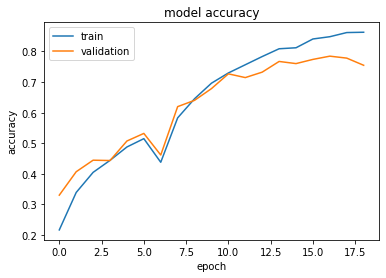

In [ ]:
plotaccuracy(history)

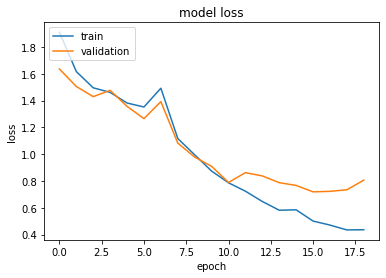

In [ ]:
plotloss(history)

Tried Image Augmentation, but not giving good performance as I expected, may be something wrong with my approach.

In [ ]:

#optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#augmented_optimizer=optimizer

# define sequential model
model_augmented = tf.keras.models.Sequential()

# Add the vgg convolutional base model
model_augmented.add(vgg_layers)

# add flatten layer
model_augmented.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
#model_augmented.add(tf.keras.layers.Dense(256, activation='relu'))
#model_augmented.add(tf.keras.layers.Dropout(rate=0.4))

model_augmented.add(Dense(1024,activation=('relu'),input_dim=512))
model_augmented.add(Dense(512,activation=('relu'))) 
model_augmented.add(Dense(256,activation=('relu'))) 
model_augmented.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_augmented.add(Dense(128,activation=('relu')))
model_augmented.add(Dropout(.2))


# add output layer
model_augmented.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model_augmented.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model_augmented.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [ ]:
history_augmented = model_augmented.fit(train_generator.flow(x_train,y_train,batch_size=128),
                      validation_data=val_generator.flow(x_validation,y_validation,batch_size=128),
                      callbacks=[es_callback], 
                      epochs=EPOCHS,
                      verbose=1)

Epoch 1/100
391/391 [==============================] - 33s 84ms/step - loss: 0.8364 - accuracy: 0.1081 - val_loss: 0.7336 - val_accuracy: 0.1014
Epoch 2/100
391/391 [==============================] - 32s 83ms/step - loss: 0.6745 - accuracy: 0.1087 - val_loss: 0.7641 - val_accuracy: 0.1063
Epoch 3/100
391/391 [==============================] - 32s 83ms/step - loss: 0.6204 - accuracy: 0.1041 - val_loss: 0.6822 - val_accuracy: 0.0904
Epoch 4/100
391/391 [==============================] - 32s 81ms/step - loss: 0.5973 - accuracy: 0.1068 - val_loss: 0.6825 - val_accuracy: 0.0845
Epoch 5/100
391/391 [==============================] - 32s 83ms/step - loss: 0.5674 - accuracy: 0.1053 - val_loss: 0.6949 - val_accuracy: 0.1107
Epoch 6/100
391/391 [==============================] - 32s 82ms/step - loss: 0.5562 - accuracy: 0.1043 - val_loss: 0.6871 - val_accuracy: 0.1203
Epoch 00006: early stopping


In [ ]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
test_data.shape

(2000, 3072)

In [ ]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,156,186,205,153,183,201,153,183,201,152,182,201,152,184,201,149,181,199,146,178,195,152,184,201,149,181,198,147,177,198,155,186,203,143,174,186,135,166,180,153,...,57,24,48,60,27,56,69,30,62,79,32,63,79,37,64,76,33,57,72,36,61,79,37,65,83,35,67,86,36,72,90,40,73,92,49,79,99,46,77,97
1996,68,101,169,69,103,173,70,104,176,71,104,178,73,106,182,77,110,186,81,115,189,85,119,192,89,123,196,92,127,199,97,131,204,102,136,209,112,138,211,107,...,88,65,71,70,57,63,61,49,55,53,65,72,70,68,75,72,58,64,62,43,52,47,40,52,43,45,57,48,56,67,58,61,73,64,51,62,53,49,61,52
1997,216,190,168,219,193,169,214,189,163,188,158,126,157,121,87,143,109,84,133,101,83,127,92,71,119,87,64,151,127,103,201,182,165,173,148,128,132,103,80,140,...,104,184,150,108,180,146,104,173,136,96,170,133,93,150,118,84,134,112,89,149,130,110,171,151,126,174,154,127,179,160,135,182,167,150,184,170,152,188,171,151
1998,46,24,17,43,32,11,77,82,60,117,139,134,115,147,145,123,150,143,136,157,144,139,155,139,141,153,141,148,160,150,154,166,156,151,163,153,155,168,158,156,...,153,104,135,152,102,137,152,98,134,149,102,134,151,102,135,152,104,136,153,103,135,152,105,137,151,104,136,149,102,134,147,102,134,146,100,131,145,99,130,148


In [ ]:
test_data_float = test_data.astype('float32')
#x_test=x_test.astype("float32")
#x_test=(x_test-mean)/std
test_data_float_rename = test_data_float.rename_axis('ID').values
test_data_reshaped = test_data_float_rename.reshape(2000,32,32,3)
mean_test=np.mean(test_data_reshaped)
std_test=np.std(test_data_reshaped)
test_data_final = (test_data_reshaped - mean_test ) /std_test
test_data_final[0]

array([[[-0.37442526, -0.26551396, -0.21883766],
        [-0.46777782, -0.32774898, -0.24995519],
        [-0.48333657, -0.32774898, -0.23439643],
        ...,
        [ 0.54354155,  0.54354155,  0.3723952 ],
        [ 0.77692294,  0.76136416,  0.57465905],
        [ 1.1347744 ,  1.0880982 ,  0.8858343 ]],

       [[-0.34330773, -0.24995519, -0.20327891],
        [-0.46777782, -0.3588665 , -0.2810727 ],
        [-0.49889535, -0.3588665 , -0.2810727 ],
        ...,
        [ 0.7146879 ,  0.69912916,  0.51242405],
        [ 0.839158  ,  0.7924817 ,  0.6057766 ],
        [ 1.1347744 ,  1.0569806 ,  0.8547167 ]],

       [[-0.23439643, -0.17216139, -0.1254851 ],
        [-0.37442526, -0.2810727 , -0.23439643],
        [-0.48333657, -0.34330773, -0.29663146],
        ...,
        [ 0.97918683,  0.9480693 ,  0.74580544],
        [ 0.93251055,  0.8702755 ,  0.6835704 ],
        [ 1.025863  ,  0.93251055,  0.69912916]],

       ...,

       [[-0.32774898, -0.3588665 , -0.5144541 ],
        [-0

In [ ]:
predictions_encoded = model.predict(test_data_final)
predictions_encoded

array([[7.68554583e-03, 6.33965246e-05, 8.69610846e-01, ...,
        7.18095631e-04, 3.30578740e-04, 4.82026844e-05],
       [6.74799178e-03, 6.72300998e-03, 4.48361225e-02, ...,
        1.14875408e-02, 7.04422314e-03, 1.39343105e-02],
       [1.61920470e-04, 4.01388843e-06, 1.31084188e-03, ...,
        9.11842287e-01, 3.79736605e-07, 3.34662582e-05],
       ...,
       [3.05632973e-04, 4.14493814e-04, 8.97640642e-03, ...,
        9.83242877e-04, 2.20067988e-04, 6.01762091e-04],
       [2.42883514e-04, 5.53821621e-04, 1.15899798e-02, ...,
        8.14794470e-03, 1.34469621e-04, 4.48310922e-04],
       [2.32844725e-02, 2.11114122e-04, 1.49970636e-01, ...,
        7.73874065e-03, 8.08852492e-04, 3.10430449e-04]], dtype=float32)

In [ ]:
import numpy as np
predictions_decoded = print(np.argmax(predictions_encoded,axis=1).tolist())
predictions_decoded

[2, 3, 7, 8, 6, 9, 3, 7, 3, 5, 0, 1, 4, 9, 4, 7, 7, 0, 7, 6, 5, 9, 7, 8, 4, 7, 0, 7, 0, 7, 7, 3, 2, 4, 2, 0, 6, 4, 2, 4, 5, 2, 0, 1, 4, 3, 5, 2, 4, 4, 3, 8, 7, 5, 8, 9, 1, 3, 9, 0, 7, 1, 7, 6, 1, 1, 9, 8, 3, 1, 6, 6, 9, 3, 2, 0, 4, 3, 4, 8, 4, 5, 8, 9, 1, 7, 3, 6, 3, 4, 3, 3, 9, 8, 9, 0, 8, 7, 3, 1, 8, 5, 2, 0, 7, 9, 4, 0, 3, 7, 3, 0, 0, 7, 1, 7, 6, 5, 7, 2, 9, 6, 1, 7, 6, 3, 3, 0, 1, 0, 7, 3, 2, 8, 3, 7, 9, 4, 9, 1, 7, 0, 5, 4, 4, 6, 6, 8, 2, 0, 3, 4, 2, 0, 5, 5, 5, 6, 2, 4, 2, 2, 9, 0, 7, 5, 6, 1, 8, 1, 2, 9, 9, 2, 9, 6, 0, 2, 3, 7, 2, 5, 2, 5, 2, 6, 4, 7, 4, 3, 6, 8, 0, 5, 3, 2, 4, 6, 8, 1, 8, 2, 6, 6, 8, 0, 1, 0, 0, 3, 3, 8, 1, 5, 6, 8, 6, 7, 1, 3, 5, 4, 5, 7, 5, 5, 3, 0, 3, 7, 5, 6, 3, 1, 9, 8, 8, 8, 7, 7, 1, 7, 0, 5, 2, 4, 6, 4, 6, 9, 0, 8, 9, 9, 1, 5, 3, 8, 7, 2, 4, 0, 2, 9, 8, 3, 2, 6, 0, 5, 8, 8, 8, 9, 3, 6, 1, 6, 3, 9, 0, 5, 3, 1, 4, 0, 4, 3, 8, 4, 5, 4, 7, 1, 0, 1, 0, 3, 9, 0, 2, 3, 4, 0, 0, 3, 7, 9, 5, 9, 2, 3, 7, 1, 1, 3, 2, 5, 8, 0, 5, 0, 1, 9, 4, 9, 9, 1, 8, 8, 6, 6, 8, 